# Task 1

In [73]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('ames.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 79 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        2930 non-null   object 
 1   MSZoning          2930 non-null   object 
 2   LotFrontage       2930 non-null   float64
 3   LotArea           2930 non-null   float64
 4   Street            2930 non-null   object 
 5   Alley             2930 non-null   object 
 6   LotShape          2930 non-null   object 
 7   LandContour       2930 non-null   object 
 8   Utilities         2930 non-null   object 
 9   LotConfig         2930 non-null   object 
 10  LandSlope         2930 non-null   object 
 11  Neighborhood      2930 non-null   object 
 12  Condition1        2930 non-null   object 
 13  Condition2        2930 non-null   object 
 14  BldgType          2930 non-null   object 
 15  HouseStyle        2930 non-null   object 
 16  OverallQual       2930 non-null   object 


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,3,2010,WD,Normal,189900


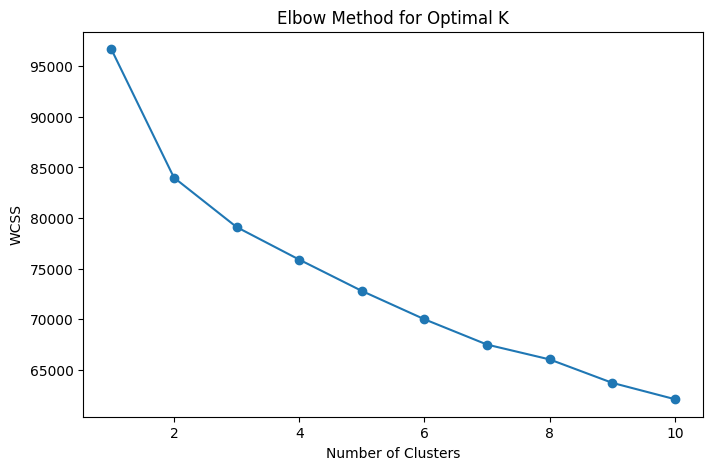

In [74]:
# Select features for clustering
numeric_features = df.select_dtypes(include=['float64', 'int64']).dropna()

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# Elbow Method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [75]:
k = 2  # Selected from elbow method graph
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
numeric_features['Cluster'] = kmeans.fit_predict(scaled_data)

print(numeric_features.head())

   LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0        141.0  31770.0       1960          1960       112.0         2.0   
1         80.0  11622.0       1961          1961         0.0         6.0   
2         81.0  14267.0       1958          1958       108.0         1.0   
3         93.0  11160.0       1968          1968         0.0         1.0   
4         74.0  13830.0       1997          1998         0.0         3.0   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  FirstFlrSF  ...  OpenPorchSF  \
0         0.0      441.0       1080.0      1656.0  ...         62.0   
1       144.0      270.0        882.0       896.0  ...          0.0   
2         0.0      406.0       1329.0      1329.0  ...         36.0   
3         0.0     1045.0       2110.0      2110.0  ...          0.0   
4         0.0      137.0        928.0       928.0  ...         34.0   

   EnclosedPorch  Threeseasonporch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0            0.0               0.0    

# Task 2

In [77]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_excel('Online Retail.xlsx')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


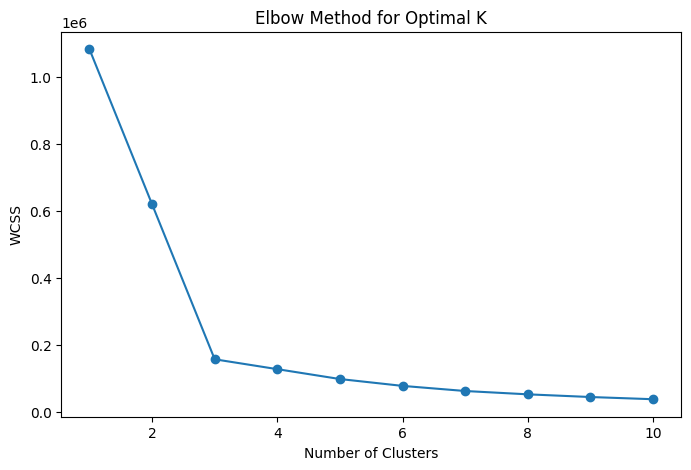

In [78]:
# Make TotalAmount feature
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

# Select TotalAmount and Quantity Features for clustering
selected_data = data[['TotalAmount', 'Quantity']].dropna()

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)


# Elbow Method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()




In [79]:

k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
selected_data['Cluster'] = kmeans.fit_predict(scaled_data)

print(selected_data)


        TotalAmount  Quantity  Cluster
0             15.30         6        0
1             20.34         6        0
2             22.00         8        0
3             20.34         6        0
4             20.34         6        0
...             ...       ...      ...
541904        10.20        12        0
541905        12.60         6        0
541906        16.60         4        0
541907        16.60         4        0
541908        14.85         3        0

[541909 rows x 3 columns]


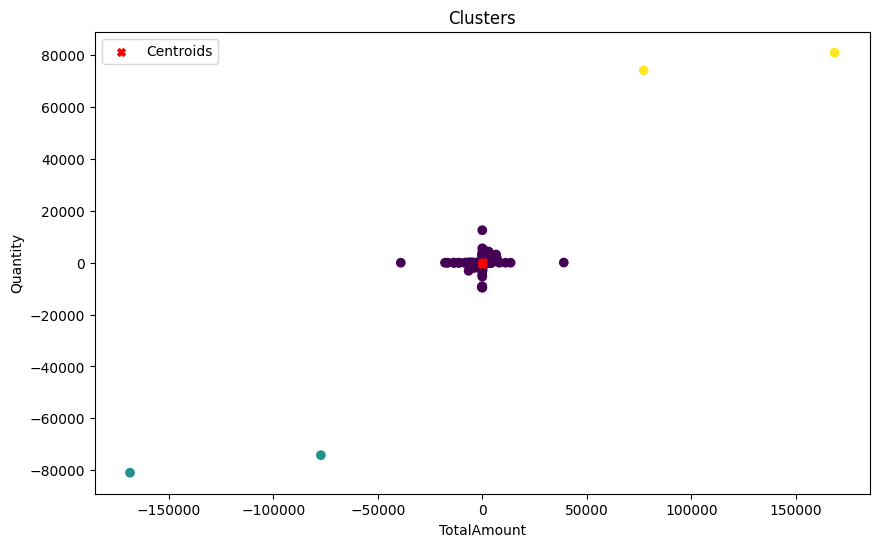

In [91]:
# Visualize clusters

cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
plt.scatter(selected_data['TotalAmount'], selected_data['Quantity'], c=selected_data['Cluster'], cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=30, c='red', marker='X', label='Centroids')
plt.title('Clusters')
plt.xlabel('TotalAmount')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# Task 3

In [132]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('Indian Personal Finance and Spending Habits.csv')
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [133]:
# Select relevant Features (Dropping irrelevent features)
selected_data = data.drop(columns=['Age', 'Dependents', 'Occupation', 'City_Tier']).dropna()

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Analyze
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:\n", explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print("\nCumulative Explained Variance:\n", cumulative_variance)

Explained Variance:
 [0.76506628 0.04147237 0.03407977 0.01879611 0.01837243 0.01706636
 0.01604424 0.01443312 0.01342683 0.0129345  0.00961927 0.00847307
 0.00652928 0.00430014 0.00404532 0.00323933 0.00313941 0.00264104
 0.00230183 0.00158713 0.0012638  0.00116837 0.        ]

Cumulative Explained Variance:
 [0.76506628 0.80653865 0.84061841 0.85941452 0.87778695 0.89485331
 0.91089755 0.92533067 0.93875751 0.95169201 0.96131127 0.96978434
 0.97631362 0.98061376 0.98465909 0.98789842 0.99103783 0.99367887
 0.9959807  0.99756783 0.99883163 1.         1.        ]


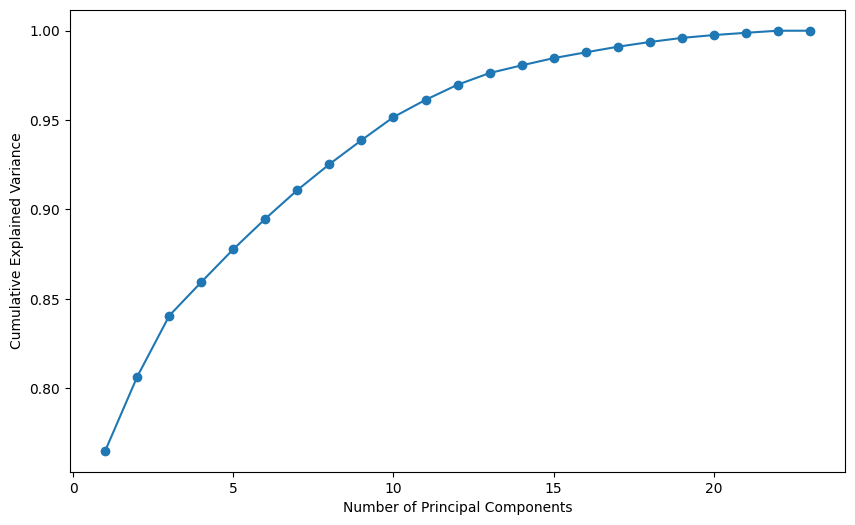

In [134]:
# Plot cumulative variance to visualize number of components to retain
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()



In [135]:
# number of components to retain 
num_components = np.argmax(cumulative_variance >= 0.95) + 1

# Transform data
pca_selected = PCA(n_components=num_components)
reduced_data = pca_selected.fit_transform(scaled_data)

reduced_data.shape

(20000, 10)

### Insights:
### 10 components were selected and original dataset was reduced to a shape of (20000, 10)

### The first few principal components explain a significant portion of the variance, indicating that the dataset's complexity can be reduced while retaining most of the information. 

### This dimensionality reduction makes it easier to visualize, analyze, and use the data for further tasks like clustering.